In [25]:
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,log_loss
from sklearn.svm import SVC,SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,minmax_scale
from PCA import pca

In [2]:
a = np.array([4,2,6,5])
np.linalg.norm(a)

9.0

In [3]:
iris = pd.read_csv(r"C:\Users\Anonymous\Desktop\Machine Learning\Datasets\iris.csv")

In [4]:
X = iris.drop('Species',axis = 1)
y = iris['Species']
prcomp = PCA()

In [5]:
comps = prcomp.fit_transform(X)
print(comps.shape)

(150, 4)


In [6]:
comps = pd.DataFrame(comps , columns = ['PC1','PC2','PC3','PC4'])
print(comps.var())

PC1    4.228242
PC2    0.242671
PC3    0.078210
PC4    0.023835
dtype: float64


In [7]:
cov_mat = np.cov(X,rowvar=False)
values,vectors = np.linalg.eig(cov_mat)
print("Eigen Values : ",values)

Eigen Values :  [4.22824171 0.24267075 0.0782095  0.02383509]


In [8]:
print(prcomp.explained_variance_)

[4.22824171 0.24267075 0.0782095  0.02383509]


In [9]:
print("% variance Explained")
print(prcomp.explained_variance_ratio_*100)

% variance Explained
[92.46187232  5.30664831  1.71026098  0.52121839]


In [10]:
X_Red_PC =comps[['PC1','PC2']]
y = iris['Species']
X_Red_PC['Species'] = iris['Species'].values

C:\Users\Anonymous\AppData\Local\Temp\ipykernel_3572\1327156299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Red_PC['Species'] = iris['Species'].values


In [11]:
X_Red_PC['Species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

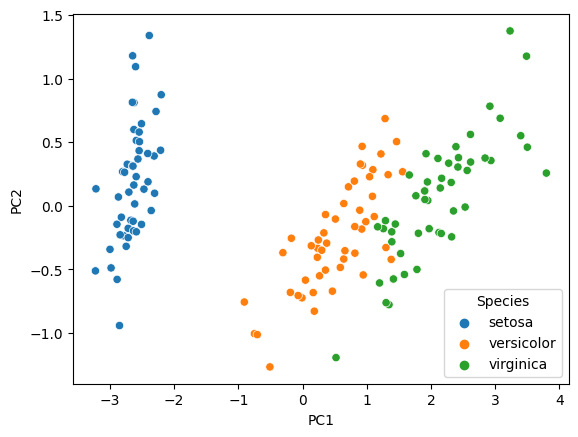

In [12]:
sns.scatterplot(data=X_Red_PC, x='PC1',y='PC2',hue='Species')
plt.show()

In [20]:
############# Applying Supervised Learning #######################
X = iris.drop('Species',axis = 1)
y = iris['Species']
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y, 
                                                 random_state=2,test_size=0.3)
svm = SVC(probability=True,kernel='linear',random_state=2)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
y_pred_prob = svm.predict_proba(X_test)
print("log loss : ",log_loss(y_test,y_pred_prob))

Accuracy Score :  0.9777777777777777
log loss :  0.07993209472359179


In [24]:
############# Applying Supervised Learning #######################
X =  X_Red_PC.drop('Species',axis = 1)
y = X_Red_PC['Species']
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y, 
                                                 random_state=2,test_size=0.3)
svm = SVC(probability=True,kernel='linear',random_state=2)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
y_pred_prob = svm.predict_proba(X_test)
print("log loss : ",log_loss(y_test,y_pred_prob))

Accuracy Score :  0.9777777777777777
log loss :  0.1081691678918928


In [27]:
############################ Milk data set ###################
milk = pd.read_csv(r"C:\Users\Anonymous\Desktop\Machine Learning\Datasets\milk.csv",index_col=0)
milk

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA PIG,81.9,7.4,7.2,2.7,0.85


In [ ]:
scaler = StandardScaler()
milk_scaled = scaler.fit_transform()

In [45]:
bankrupt = pd.read_csv(r"C:\Users\Anonymous\Desktop\Advance Statistics\Bankruptcy\Bankruptcy.csv")
bankrupt

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14


In [46]:
X = bankrupt.drop(['NO','D','YR'],axis =1 )
y = bankrupt['D']

prcomp = PCA()

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
comps = prcomp.fit_transform(X_scaled)

print("% Variatation explained")
print(prcomp.explained_variance_ratio_*100)

% Variatation explained
[3.71164046e+01 1.30656568e+01 1.13328684e+01 9.03654983e+00
 7.14283057e+00 4.56742155e+00 4.41179681e+00 3.86029633e+00
 3.36822807e+00 2.02599508e+00 1.12502396e+00 9.67106170e-01
 6.43985846e-01 4.77551877e-01 2.60087390e-01 1.97220447e-01
 1.22678385e-01 1.06360914e-01 6.57753837e-02 3.94618494e-02
 2.99590490e-02 2.02680539e-02 9.95879999e-03 6.51372124e-03]
